Lesson 1 - Applied Regression Modeling - Bivariate Straight Line Linear Regression

In [1]:
import pandas as pd
import tabula
import numpy as np
import random
import os

from matplotlib import pyplot as plt
import warnings

warnings.filterwarnings("ignore")

# Straight Line Regression
The next part of this course considers problems involving modeling the relationship between two variables. The simplest meaningful model between two variables involves a straight line.

# Attributions / Citation
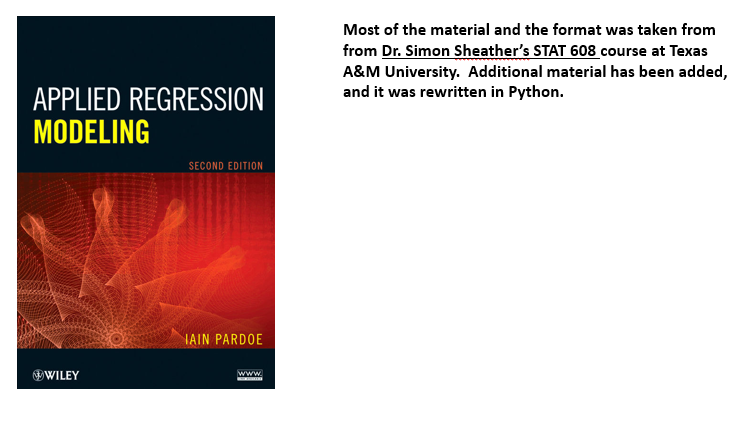

<b>ATTRIBUTION/ CITATION:</b> Most of this material including the course outline was taken from Dr. Simon Sheather's STAT 608 course at Texas A&M University. However, it uses additional examples and was adopted for use with Python. In addition, much of the course material used the textbook Applied Regression Modeling by Iain Pardoe. 

# Get the data
The data consist of average attendance figures at home games of college football in 2014 and 2015

In [2]:
def get_football_attendance_data(save_to_pickle = True):
    
    path_2014 = 'http://fs.ncaa.org/Docs/stats/football_records/Attendance/2014.pdf'
    path_2015 = 'http://fs.ncaa.org/Docs/stats/football_records/Attendance/2015.pdf'

    football_stats_2014 = tabula.read_pdf(path_2014, pages = (7,8), pandas_options={'header': None})
    football_stats_2015 = tabula.read_pdf(path_2015, pages = (7,8), pandas_options={'header': None})
    
    # Munge 2014 Football Data
    table1 = football_stats_2014[0].iloc[:,0:4].rename(columns={0: 'School', 1: '2014 Home Games', 2:'2014 Attendance', 3: '2014 Average Attendance'})
    table2 = football_stats_2014[0].iloc[:,4:8].rename(columns={4: 'School', 5: '2014 Home Games', 6:'2014 Attendance', 7: '2014 Average Attendance'})
    table3 = football_stats_2014[1].iloc[0:9,0:3].rename(columns={0: 'School', 1:'2014 Attendance', 2: '2014 Average Attendance'})
    #table3[['School', '2014 Home Games']] = football_stats_2014['School'].str.extract(r'(.*?)\s+([A-Z]{1,}\d{3,})?$', expand=True)

    # Split the number of home games from the name column
    table3['2014 Home Games'] = table3['School'].str.rsplit(' ', n = 1, expand = True)[1] 
    table3['School'] = table3['School'].str.rsplit(' ', n = 1, expand = True)[0] 
    table4 = football_stats_2014[1].iloc[0:8,3:7].rename(columns={3: 'School', 4: '2014 Home Games', 5:'2014 Attendance', 6: '2014 Average Attendance'})

    football_2014 = pd.concat([table1,table2, table3, table4]).sort_values('School').reset_index().drop(columns = 'index')

    # Munge 205 Football Data
    table1 = football_stats_2015[0].iloc[:,0:4].rename(columns={0: 'School', 1: '2015 Home Games', 2:'2015 Attendance', 3: '2015 Average Attendance'})
    table2 = football_stats_2015[0].iloc[:,4:8].rename(columns={4: 'School', 5: '2015 Home Games', 6:'2015 Attendance', 7: '2015 Average Attendance'})
    table3 = football_stats_2015[1].iloc[0:9,0:3].rename(columns={0: 'School', 1:'2015 Attendance', 2: '2015 Average Attendance'})

    # split the number of home games from the name column
    table3['2015 Home Games'] = table3['School'].str.rsplit(' ', n = 1, expand = True)[1] 
    table3['School'] = table3['School'].str.rsplit(' ', n = 1, expand = True)[0] 
    table4 = football_stats_2015[1].iloc[0:8,3:7].rename(columns={3: 'School', 4: '2015 Home Games', 5:'2015 Attendance', 6: '2015 Average Attendance'})

    football_2015 = pd.concat([table1,table2, table3, table4]).sort_values('School').reset_index().drop(columns = 'index')

    # Merge the data sets
    football_stats = football_2014.merge(football_2015, left_on='School', right_on = 'School')

    # Remove the comma delimitted values in the columns and convert to integer values
    football_stats['2014 Average Attendance'] = football_stats['2014 Average Attendance'].str.replace(',', '')
    football_stats['2014 Attendance'] = football_stats['2014 Attendance'].str.replace(',', '')
    football_stats['2015 Average Attendance'] = football_stats['2015 Average Attendance'].str.replace(',', '')
    football_stats['2015 Attendance'] = football_stats['2015 Attendance'].str.replace(',', '')

    # Make all values of type int
    football_stats = football_stats.astype({'2014 Average Attendance':int,
                                            '2014 Attendance': int,
                                            '2014 Home Games': int, 
                                            '2015 Home Games': int, 
                                            '2015 Attendance': int,
                                            '2015 Average Attendance': int})

    if save_to_pickle:
        
        # Save as a pickle file
        football_stats.to_pickle('./football_stats.pkl')
    
    return football_stats


In [3]:
if os.path.exists('./football_stats.pkl'):
    football_stats = pd.read_pickle('./football_stats.pkl')
    print("Yay! It's there!")

else:
    football_stats = get_football_attendance_data()
print('Length of the dataset is ', len(football_stats))
football_stats.head(50)

Yay! It's there!
Length of the dataset is  118


School  2014 Home Games  2014 Attendance  \
0         Air Force                6           168967   
1             Akron                6            55019   
2           Alabama                7           710736   
3           Arizona                7           354973   
4       Arizona St.                6           343073   
5          Arkansas                6           399124   
6      Arkansas St.                6           149163   
7   Army West Point                5           171310   
8            Auburn                7           612157   
9               BYU                6           342843   
10         Ball St.                6            56332   
11           Baylor                6           280257   
12        Boise St.                7           227526   
13   Boston College                7           239893   
14    Bowling Green                6            91365   
15          Buffalo                6           122418   
16       California                6           286051   
17    Central Mich.                6            97838   
18       Cincinnati                6           173037   
19          Clemson                7           572262   
20         Colorado                6           226670   
21     Colorado St.                6           159450   
22             Duke                7           191039   
23    East Carolina                6           268713   
24    Eastern Mich.                5            75127   
25              FIU                8            95728   
26    Fla. Atlantic                5            70608   
27          Florida                6           515001   
28      Florida St.                7           575478   
29       Fresno St.                6           209257   
30          Georgia                7           649222   
31      Georgia St.                6            90037   
32     Georgia Tech                6           291113   
33           Hawaii                7           192159   
34          Houston                7           198177   
35            Idaho                5            64432   
36         Illinois                7           290842   
37          Indiana                6           249941   
38             Iowa                7           472584   
39         Iowa St.                7           365377   
40           Kansas                6           204462   
41       Kansas St.                7           371565   
42         Kent St.                6            81263   
43         Kentucky                7           403002   
44    La.-Lafayette                6           154652   
45       La.-Monroe                5            90540   
46   Louisiana Tech                5           100272   
47       Louisville                6           317829   
48         Marshall                7           192229   
49         Maryland                6           281884   

    2014 Average Attendance  2015 Home Games  2015 Attendance  \
0                     28161                6           156158   
1                      9170                6           108588   
2                    101534                7           707786   
3                     50710                6           308355   
4                     57179                7           368985   
5                     66521                7           471279   
6                     24861                6           138043   
7                     34262                6           185946   
8                     87451                7           612157   
9                     57141                6           351191   
10                     9389                6            47841   
11                    46710                6           276960   
12                    32504                6           201669   
13                    34270                7           211433   
14                    15228                5            98042   
15                    20403                6           110743   


# Question

<b>To what extent can future college football attendance be predicted from past attendance? <p>Is there
evidence that the 2015 average attendance is significantly different from the 2014 average attendance?</p></b>

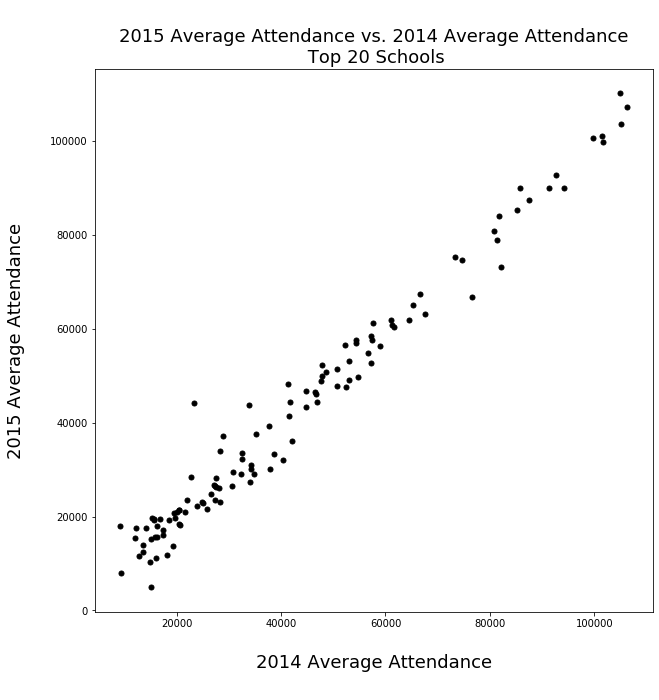

In [24]:
plt.figure(figsize = (10,10))
plt.scatter(football_stats['2014 Average Attendance'], football_stats['2015 Average Attendance'], s = 25, color = 'black')
plt.xlabel('\n2014 Average Attendance\n', fontsize = 18)
plt.ylabel('2015 Average Attendance\n', fontsize = 18)
plt.title('\n2015 Average Attendance vs. 2014 Average Attendance\n Top 20 Schools', fontsize = 18)
plt.show()

<p><b>Can 2015 Average Attendance be used as a function of 2014 Average Attendance?</b></p>
<p><b>Let's better formulate the question:  Can we make a mathematical formula that tells us what the attendance will be in 2015 from the 2014 data? (September 3, 2020, AJ HILL) </b></p>

# Definition of Regression


- Mathematically, the regression of a random variable Y on a
random variable X is E(Y|X), the mean (or average value) of
Y for a given value of X.
- For example, if X = Day of the week and Y = Sales at a given
company, then the regression of Y on X represents the
mean (or average) sales on a given day.
- The X‐variable is called the <b>explanatory</b> or <b>predictor
variable</b>, while the Y‐variable is called the <b>response
variable</b> or the <b>dependent variable</b>.

In [4]:
import statsmodels.api as sm

In [5]:
modeling_data = football_stats.copy()

In [6]:
# set your X variable, also called the explanatory variable
X = modeling_data['2014 Average Attendance'] 

# set the Y variable, also called the dependent variable
Y = modeling_data['2015 Average Attendance'] 

In [7]:
# in StatsModels you have to add a constant
X = sm.add_constant(X) # adding a constant

In [8]:
X

const  2014 Average Attendance
0      1.0                    28161
1      1.0                     9170
2      1.0                   101534
3      1.0                    50710
4      1.0                    57179
..     ...                      ...
113    1.0                    64508
114    1.0                    30794
115    1.0                    56686
116    1.0                    16306
117    1.0                    15625

[118 rows x 2 columns]

In [12]:
# fit the model and make the predicitons

model = sm.OLS(Y, X)            # passing in target to the model architecture
fitted = model.fit()            # operation causes it to calculate the values for the coefficients
predictions = fitted.predict(X) # makes predictions "yhat"

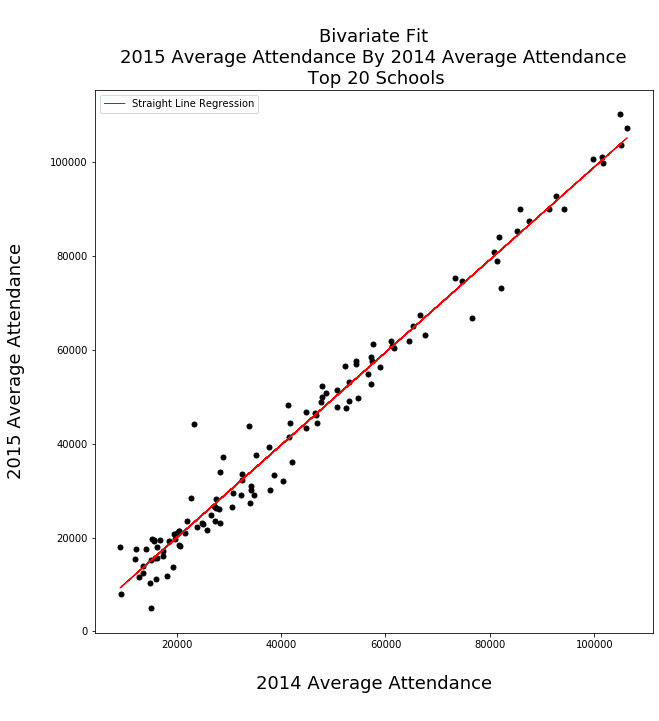

In [25]:
# plot the results
plt.figure(figsize = (10,10))
plt.scatter(football_stats['2014 Average Attendance'], football_stats['2015 Average Attendance'], s = 25, color = 'black')
plt.plot(football_stats['2014 Average Attendance'], predictions, color = 'red', label = 'Straight Line Regression', linewidth = 1)
plt.xlabel('\n2014 Average Attendance\n', fontsize = 18)
plt.ylabel('2015 Average Attendance\n', fontsize = 18)
plt.title('\nBivariate Fit\n2015 Average Attendance By 2014 Average Attendance\n Top 20 Schools', fontsize = 18)
plt.legend(loc = 2)
plt.show()

# Bivariate Linear Regression

<p>A <b>simple linear regression</b> (also known as a bivariate regression) is a linear equation describing the relationship between an <b>explanatory variable</b>and an <b>outcome variable</b>, specifically with the assumption that the explanatory variable influences the outcome variable, and not vice-versa.(Murray, James)</p>

<p>Mathematically, the regression of a random variable Y on a random variable X is E(Y|X), the mean (or average value) of Y for a given value of X.(Sheather, Simon)</p>

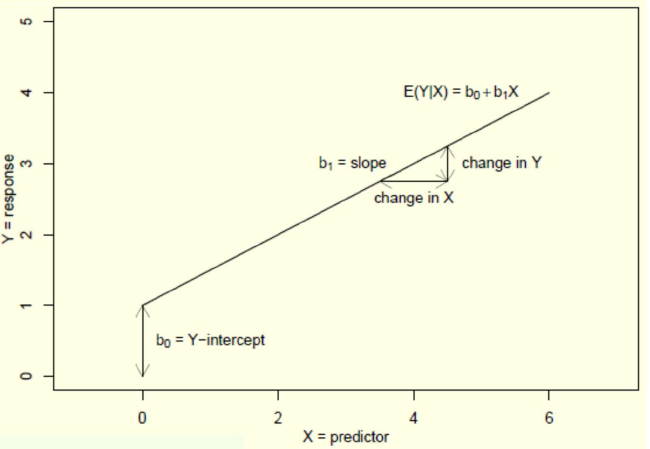

# But..... Which line fits the data best?

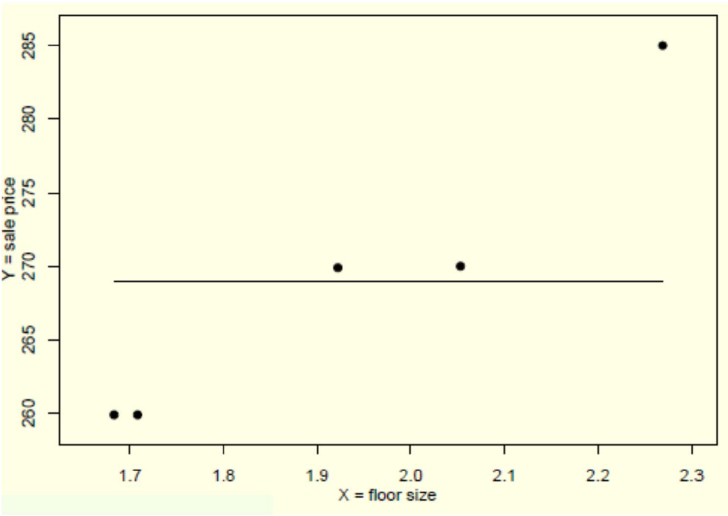

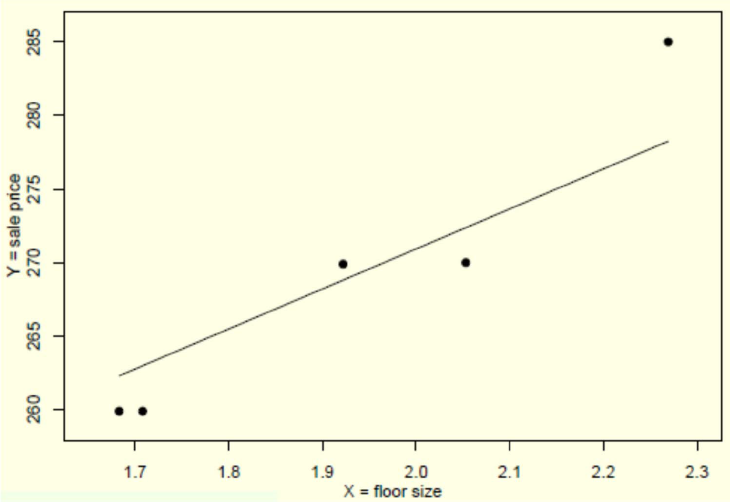

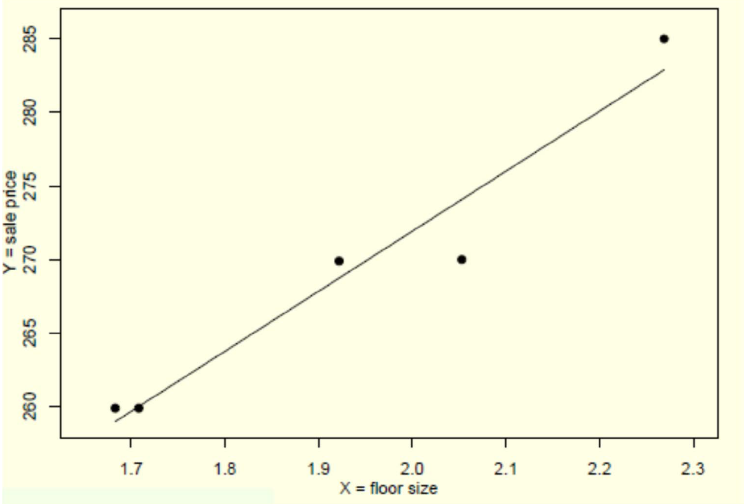

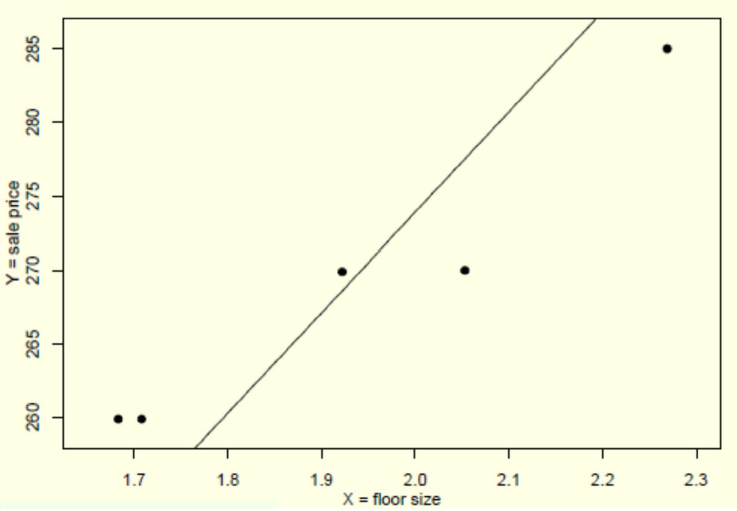

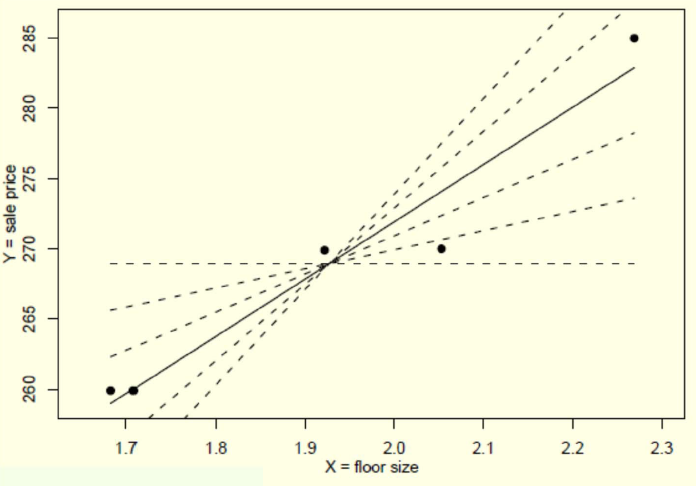

# "The Least Squares Line" --> This is the line that fits the data best in the least squares sense

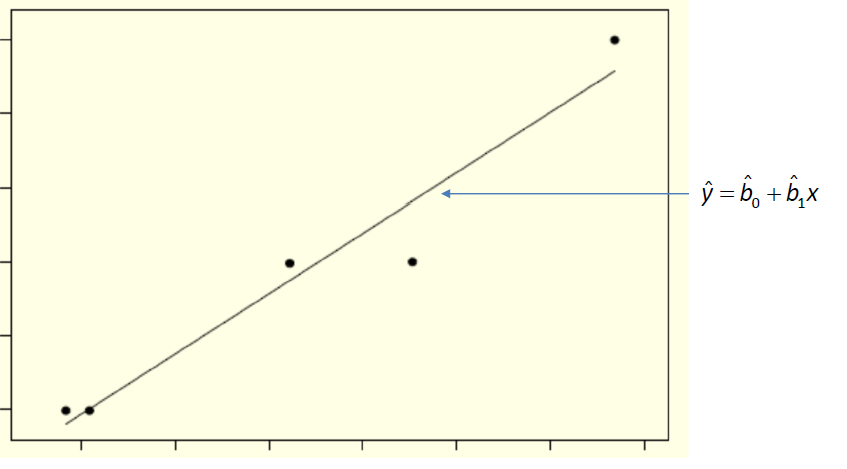

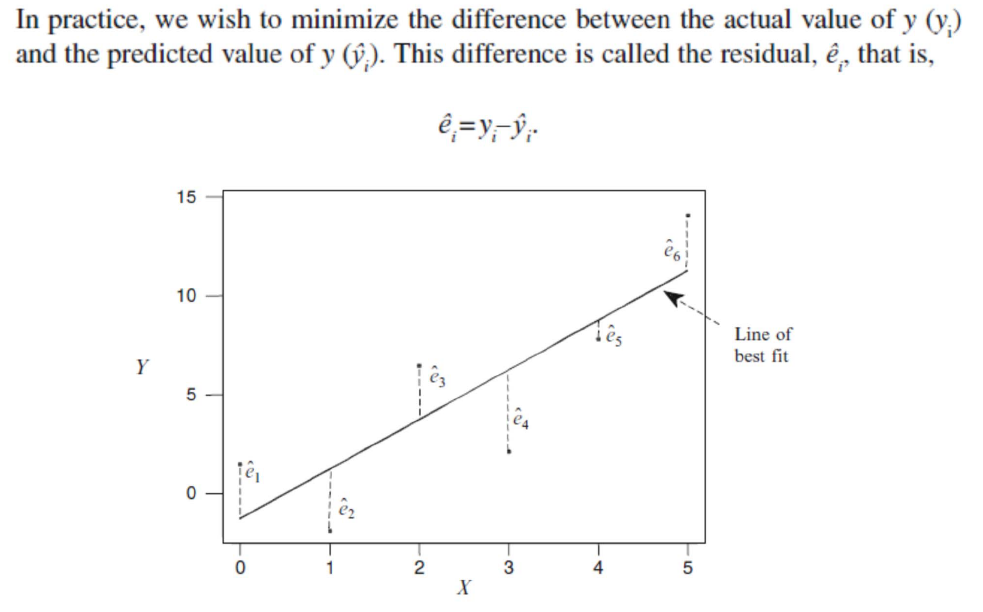

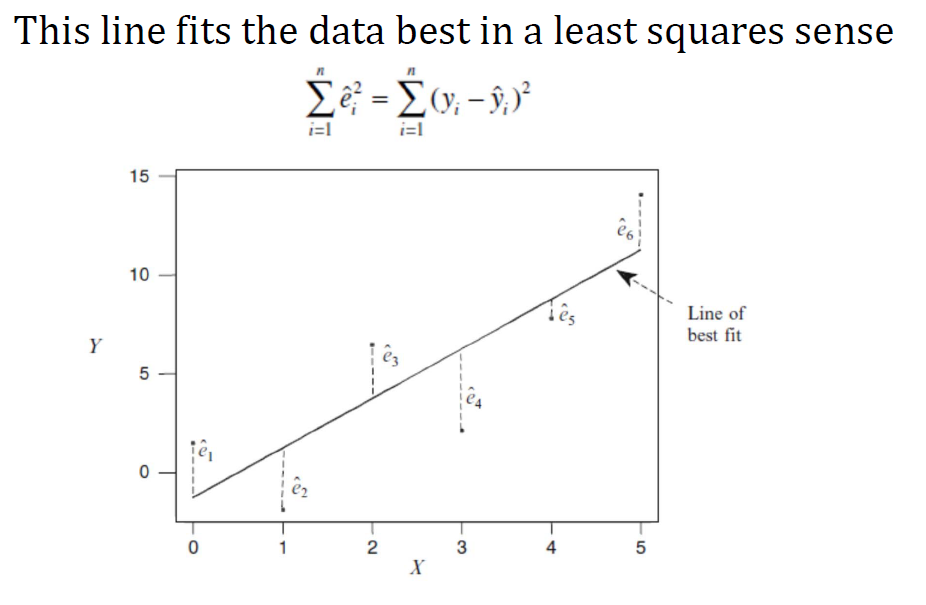

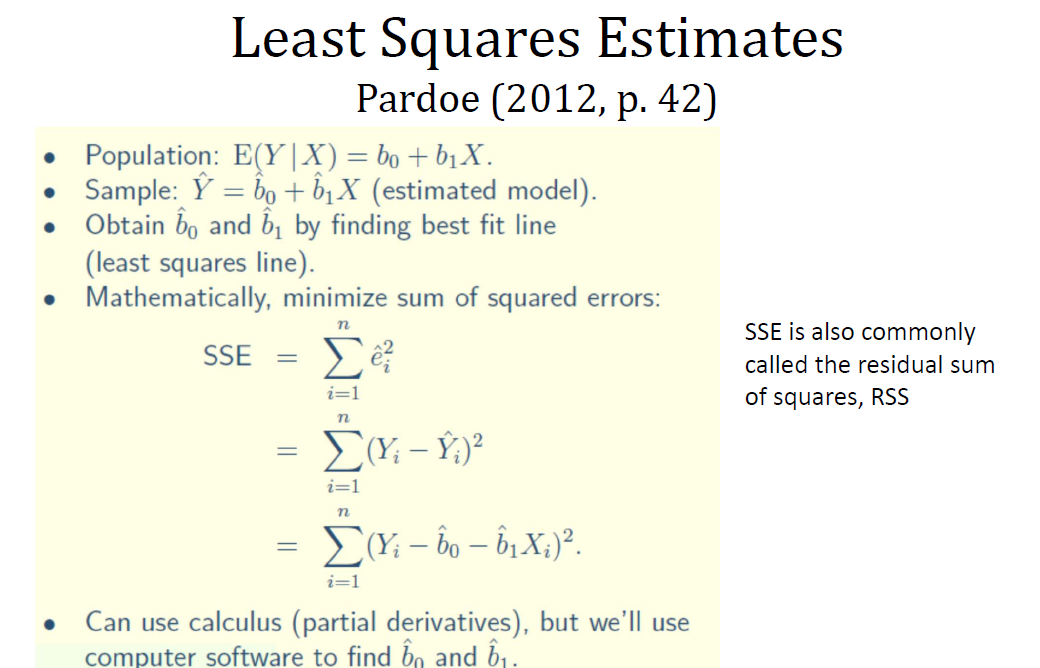

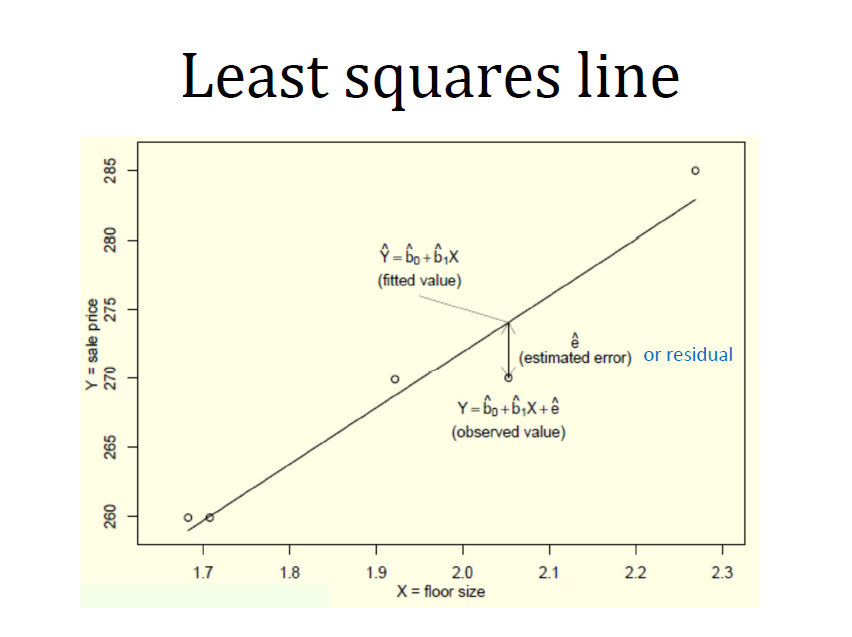

# Now let's answer the question:  To what extent can the 2015 average attendance be predicted from 2014 average attendance?

### Recall the following "least squares" equation:

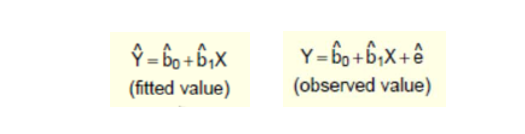


#### Fitted Value vs Observed

- Y is the <b>observed</b> outcome variable (2015 Average Attendance)
- Y "hat" is the <b>fitted</b> predicted variable


- X is the <b>observed</b> explanatory variable (2014 Average Attendance)

- <b>bo</b> "hat" is the <b>fitted</b> y intercept
- <b>b1</b> "hat" is the <b>fitted</b> coefficent (slope)
- <b>e</b> "hat" is the <b>"residual"</b> <i>(error term in in regression)</i> from the fit

# How do we interpret the results?

                               OLS Regression Results                              
Dep. Variable:     2015 Average Attendance   R-squared:                       0.974
Model:                                 OLS   Adj. R-squared:                  0.974
Method:                      Least Squares   F-statistic:                     4342.
Date:                     Thu, 03 Sep 2020   Prob (F-statistic):           9.16e-94
Time:                             10:02:12   Log-Likelihood:                -1150.7
No. Observations:                      118   AIC:                             2305.
Df Residuals:                          116   BIC:                             2311.
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

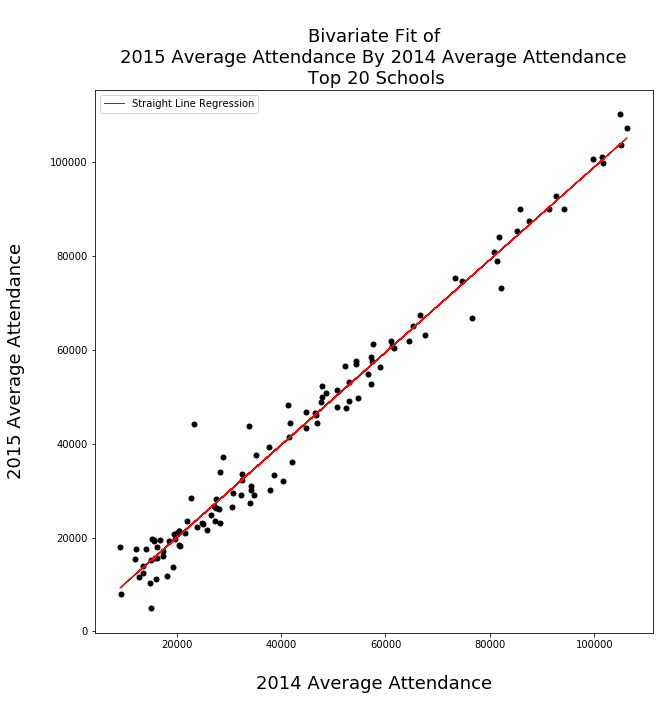

In [13]:
# print the model summary
print_model = fitted.summary()
#print_model
print(print_model)

# plot the results
plt.figure(figsize = (10,10))
plt.scatter(football_stats['2014 Average Attendance'], football_stats['2015 Average Attendance'], s = 25, color = 'black')
plt.plot(football_stats['2014 Average Attendance'], predictions, color = 'red', label = 'Straight Line Regression', linewidth = 1)
plt.xlabel('\n2014 Average Attendance\n', fontsize = 18)
plt.ylabel('2015 Average Attendance\n', fontsize = 18)
plt.title('\nBivariate Fit of\n2015 Average Attendance By 2014 Average Attendance\n Top 20 Schools', fontsize = 18)
plt.legend(loc = 2)
plt.show()

# Consider this diagram  

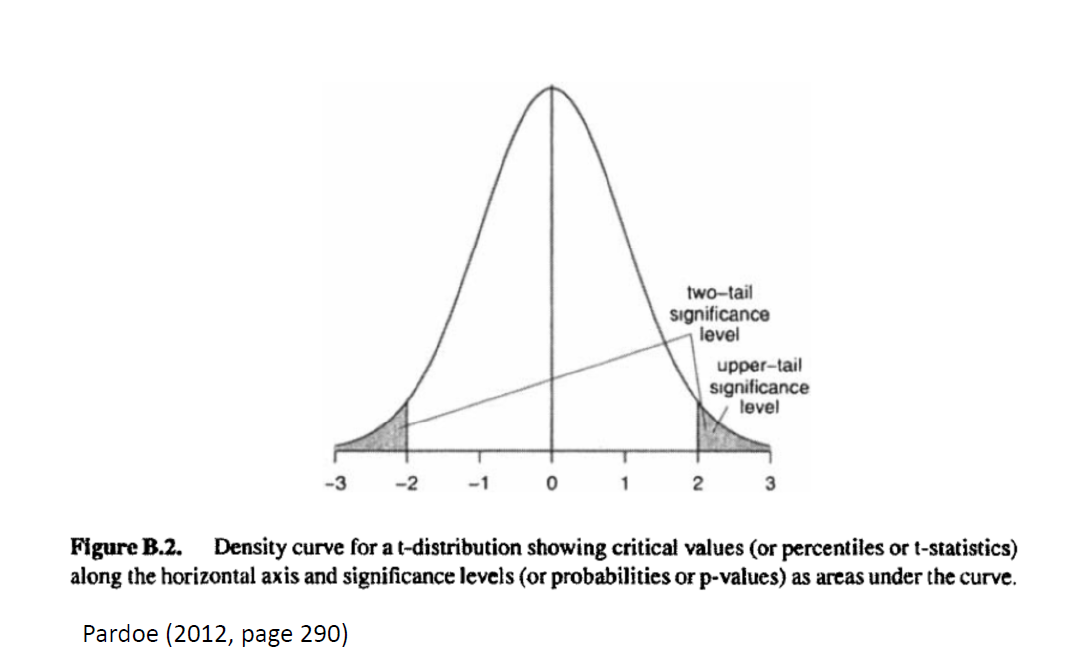

# First test the hypothesis about the intercept b0.

<p><b>TEST:</b></p> 

- <b>The Null Hypothesis (Ho)</b>     Ho: b0 =  0 

- <b>Alternative Hypothesis (Ha)</b> Ha: b0 does not equal zero.

<p><b>Test statistic:</b>  t = (b0 - 0)/Sbo </p>

- t = (206.9028 - 0)/748.651 = 0.276 
                                                    
<p><b>p-value:</b>  2P(T >= 0.276) = 0.783</p>
    
- The probability that the Null Hypothesis (H0) is true is 78.3%.

<b><b><i>Thus the intercept b0, is not statistically significantly different from zero.</i></b></b></p>  


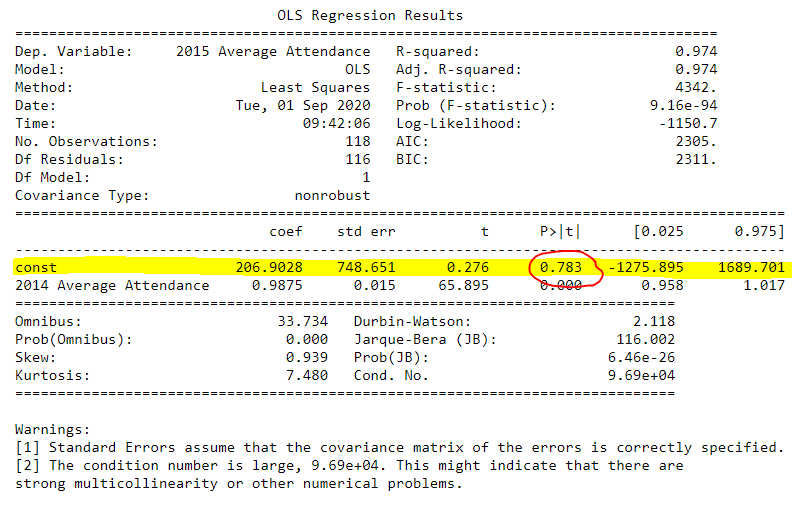

# Next test the hypothsis about the slope b1. 

<p><b>TEST:</b></p> 

- <b>The Null Hypothesis (Ho)</b>     Ho: b1 =  0 

- <b>Alternative Hypothesis (Ha)</b> Ha: b1 does not equal zero.

<p><b>Test statistic:</b>  t = (b1 - 0)/Sb1 </p>

- t = (0.9875 - 0)/0.015 = 0.65895
                                                    
<p><b>p-value:</b>  2P(T >= 0.65895) <= 0.0001 </p>
    
- The probability that the Null Hypothesis (H0) is true is  0.0001%.

<b><b><i>Thus the slope b1 is highly statistically significantly different from zero.  Thus, there is a statistically significant positive linear association between attendance in 2014 and 2015.</i></b></b></p>  

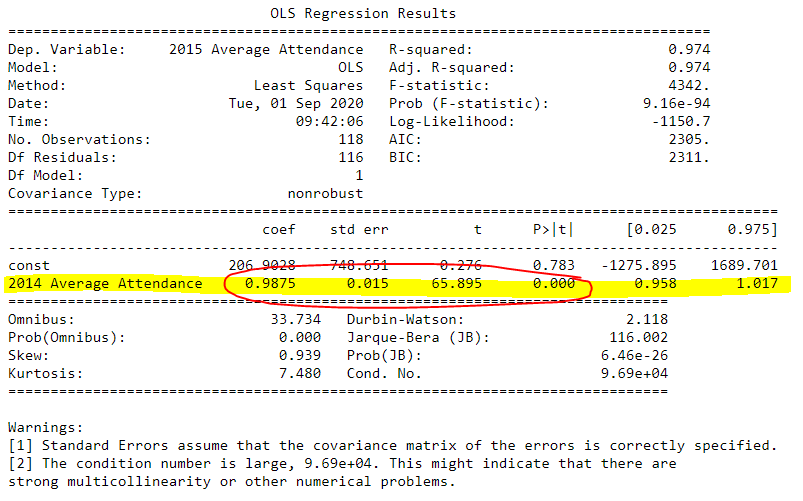

# Examine the confidence intervals for the intercept and the slope 

<p>
- Notice also that the <b>95% confidence interval</b> for the <b>intercept b0 (‐1275.895, 1689.701)</b> contains the value 0. <i>Therefore, the intercept b0 is not statistically significantly different from 0 at the 5% level.</i>
</p>
<p>
- Notice that the <b>95% confidence interval</b> for the <b>slope b1 (0.962,1.018)</b> contains the value 1. 
<i>Therefore, the slope b1 is not statistically significantly different from 1 at the 5% level.</i>
</p>

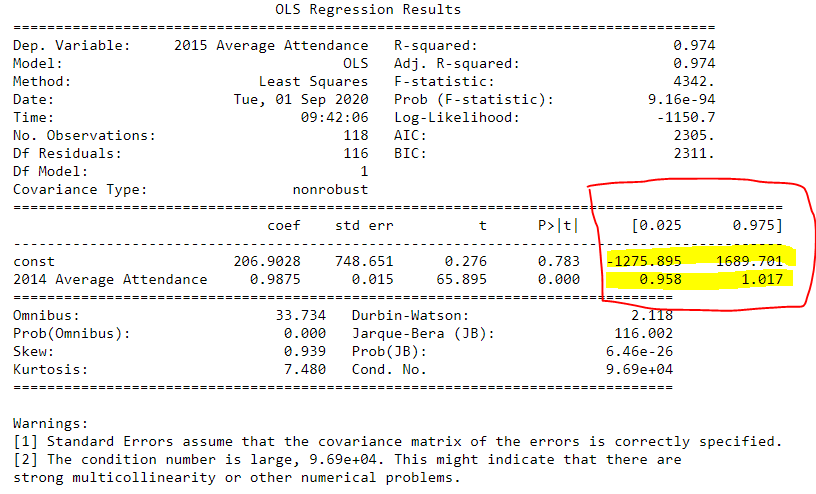

# Conclusions:  Case Study: College Football Attendance


## Is there evidence that the 2015 average attendance is significantly different from the 2014 average attendance?</p>
<p>
• Notice that the 95% confidence interval for the
slope b1 contains the value 1.</p>
<p>
• Notice also that the 95% confidence interval for
the intercept b0 contains the value 0.</p>
<p>
<p><b>Thus there is not strong evidence that 2015 average
attendance is significantly different from the 2014
average attendance.</b></p>

#  Find the Confidence Intervals (CI)s and Prediction Intervals (PI)s for the intercept and slope

### What is the Confidence Interval (CI) VS. Confidence Level
<p>A <b>Confidence Interval (CI)</b> is a range of values that likely would contain an unknown population parameter.</p> <p><b>Confidence Level</b> refers to the percentage of probability, or certainty, that the confidence interval would contain the true population parameter when you draw a random sample many times. (Investopedia)  Increasing the <b>confidence level</b> increases the error bound, making the <b>confidence interval</b> wider. Decreasing the <b>confidence level</b> decreases the error bound, making the <b>confidence interval</b> narrower.</p>

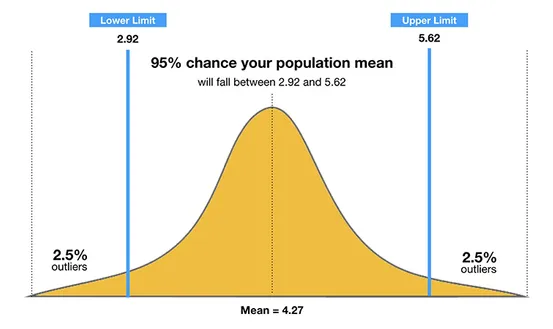

## Confidence Interval

<b>Confidence intervals</b> tell you how well you have determined a parameter of interest, such as a mean or regression coefficient. 

Assume that the data are randomly sampled from a Gaussian distribution and you are interested in determining the mean. If you sample many times, and calculate a confidence interval of the mean from each sample, you'd expect 95% of those intervals to include the true value of the population mean. The diagram below shows 95% confidence intervals for 100 samples of size 3 from a Gaussian distribution with true mean of 10. Note that 95 out of 100 intervals capture 5. This is what we would expect to see. You won’t know if the particular interval of interest to you captures the true mean, but you can expect 95% of the intervals you calculate to capture the true population parameter.

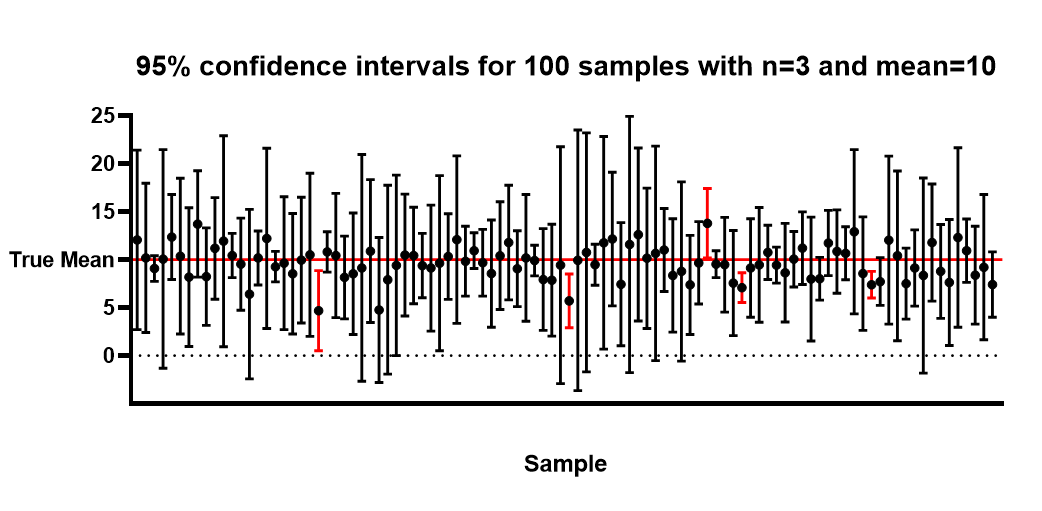

If you increase the sample size, you will see a noticeable decrease in the width of the confidence interval. The diagram below shows 95% confidence intervals for 100 samples of size 10 from a Guassian distribution with true mean of 10. Note that 94 out of 100 intervals capture 10. Due to sampling variation, in a random set of 100 confidence intervals, you won’t always have exactly 95 out of 100 intervals capture the true population parameter.



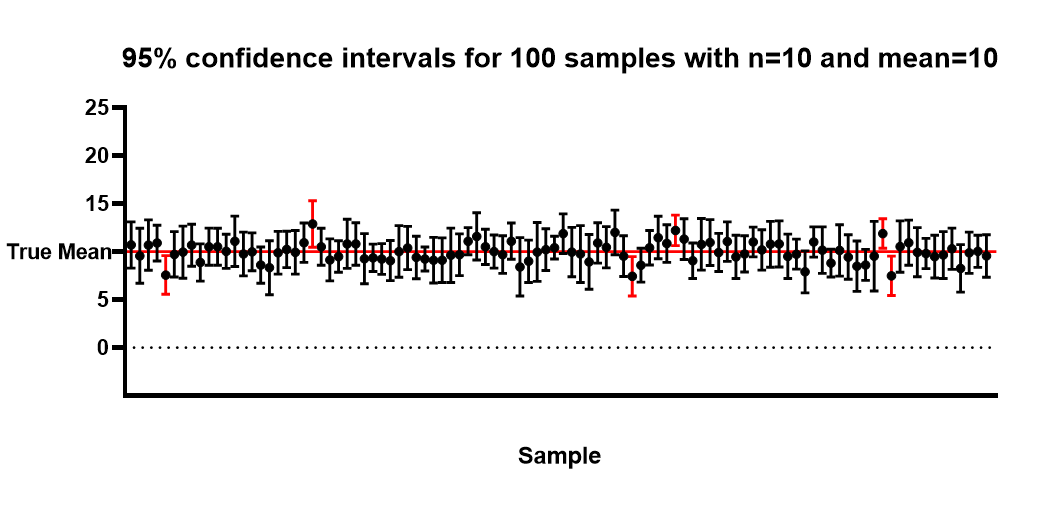

Asymptotically (as the sample size approaches infinity), the width of the interval will collapse to a single value which is the true population mean. You can see this in the formula for the confidence interval: Average t*Stdevnwhere t is a tabled value from the t distribution which depends on the confidence level and sample size. As the sample size (n) approaches infinity, the right side of the equation goes to 0 and the average will converge to the true population mean. The is not the case for Prediction and Tolerance intervals. The key point is that the confidence interval tells you about the likely location of the true population parameter and, as the sample size increases, the interval eventually converges to a single value, the true population parameter.

## Prediction Intervral

Prediction intervals tell you where you can expect to see the next data point sampled. Assume that the data are randomly sampled from a Gaussian distribution. Collect a sample of data and calculate a prediction interval. Then sample one more value from the population. If you repeat this process many times, you'd expect the prediction interval to capture the individual value 95% of the time. 

Prediction intervals must account for both the uncertainty in estimating the population mean, plus the random variation of the individual values. So a prediction interval is always wider than a confidence interval. Also, the prediction interval will not converge to a single value as the sample size increases. You can see this in the formula for the prediction interval: Average t*StDev*1+1n where t is a tabled value from the t distribution which depends on the confidence level and sample size. As the sample size (n) approaches infinity, the right side does not converge to zero, which is one way to distinguish it from a confidence interval. The key point is that the prediction interval tells you about the distribution of individual values, as opposed to the uncertainty in estimating the population mean and will not converge to a single value as the sample size increases.

 

### Confidence Interval vs. Prediction Interval
The <b>prediction interval</b> predicts in what range a future individual observation will fall, while a <b>confidence interval</b> shows the likely range of values associated with some statistical parameter of the data, such as the population mean.

## Tolerance Interval

Before moving on to tolerance intervals, let's define that word 'expect' used in defining a 95% prediction interval. If you were to simulate many prediction intervals, some would capture more than 95% of the individual values and some would capture less, but on average, they would capture 95% of the individual values. 

What if you want to be 95% sure that the interval captures at least 95% of the population? Or 90% sure that the interval captures at least 99% of the population? These questions are answered by a tolerance interval. To compute, or understand, a tolerance interval you have to specify two different percentages. One expresses how sure you want to be (confidence level), and the other expresses what fraction of the population the interval will contain (population coverage). 

If you set the first value (confidence level) to 50%, then a tolerance interval is essentially the same as a prediction interval. If you set the confidence level to a higher value (say 90% or 99%) then the tolerance interval is wider than a prediction interval. As with prediction intervals, tolerance intervals will not converge to a single value as the sample size increases. The formula for a tolerance interval is Average k*StDevwhere k is a tabled value based on the sample size and confidence level.

SOURCE: https://www.graphpad.com/support/faq/the-distinction-between-confidence-intervals-prediction-intervals-and-tolerance-intervals/

In [14]:
import statsmodels.api as sm
from scipy import stats

modeling_data = football_stats.copy()

# set your X variable, also called the explanatory variable
X = modeling_data['2014 Average Attendance']

# set the Y variable, also called the dependent variable
Y = modeling_data['2015 Average Attendance']

# in StatsModels you have to add a constant
X = sm.add_constant(X) # adding a constant

# fit the model and make the predicitons
model = sm.OLS(Y, X)

# fit the model
fitted = model.fit()

# make predictions
y_hat = fitted.predict(X) 


In [27]:
#TODO - Ask AJ About how to use this instead of calculation
fitted.conf_int(alpha=0.05, cols=None)

0            1
const                   -1275.895177  1689.700766
2014 Average Attendance     0.957785     1.017146

In [15]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std

# put predictions into the modeling dataframe
modeling_data['y_hat'] = y_hat

# mean value of X
mean_x = modeling_data['2014 Average Attendance'].mean()

# calculate predictions
y_err = Y - y_hat

# put the residual errors into the modeling dataframe
modeling_data['y_err'] = y_err

# number of values
n = len(X)

# degrees of freedom
dof = n - fitted.df_model - 1

# t-stat
t = stats.t.ppf(1-0.025, df=dof)

# standard error
s_err = np.sum(np.power(y_err, 2))

# confidence
x = X
conf = t * np.sqrt((s_err/(n-2))*(1.0/n + (np.power((x-mean_x),2) / ((np.sum(np.power(x,2))) - n*(np.power(x,2))))))
conf = conf.iloc[:,1]

# set confidence into the dataframe
modeling_data['confidence'] = conf

# put the upper and lower CI into the modeling dataframe
modeling_data['upper_ci'] = modeling_data['y_hat'] + modeling_data['confidence'].abs()
modeling_data['lower_ci'] = modeling_data['y_hat'] - modeling_data['confidence'].abs()

# set the prediction intervals
from statsmodels.sandbox.regression.predstd import wls_prediction_std

sdev, lower, upper = wls_prediction_std(fitted, exog=X, alpha=0.05)

# set the prediction interverals into the dataframe
modeling_data['upper_pi'] = upper
modeling_data['lower_pi'] = lower



In [16]:
modeling_data

School  2014 Home Games  2014 Attendance  \
0         Air Force                6           168967   
1             Akron                6            55019   
2           Alabama                7           710736   
3           Arizona                7           354973   
4       Arizona St.                6           343073   
..              ...              ...              ...   
113      Washington                7           451555   
114  Washington St.                6           184762   
115   West Virginia                6           340117   
116     Western Ky.                6            97833   
117   Western Mich.                5            78124   

     2014 Average Attendance  2015 Home Games  2015 Attendance  \
0                      28161                6           156158   
1                       9170                6           108588   
2                     101534                7           707786   
3                      50710                6           308355   
4                      57179                7           368985   
..                       ...              ...              ...   
113                    64508                7           433432   
114                    30794                6           176444   
115                    56686                7           383779   
116                    16306                6           107759   
117                    15625                6           116646   

     2015 Average Attendance          y_hat        y_err  confidence  \
0                      26026   28014.920137 -1988.920137  811.207924   
1                      18098    9261.961884  8836.038116  926.615008   
2                     101112  100468.229908   643.770092  571.367588   
3                      51393   50281.280815  1111.719185  318.976677   
4                      52712   56669.195455 -3957.195455  654.509623   
..                       ...            ...          ...         ...   
113                    61919   63906.330468 -1987.330468  647.436505   
114                    29407   30614.916929 -1207.916929  799.334064   
115                    54826   56182.374939 -1356.374939  653.848753   
116                    17960   16308.516046  1651.483954  876.639581   
117                    19441   15636.052007  3804.947993  881.026748   

          upper_ci      lower_ci       upper_pi      lower_pi  
0     28826.128061  27203.712213   36365.780599  19664.059675  
1     10188.576892   8335.346877   17661.047162    862.876606  
2    101039.597496  99896.862321  108987.976551  91948.483266  
3     50600.257492  49962.304138   58624.117407  41938.444223  
4     57323.705078  56014.685833   65019.636149  48318.754762  
..             ...           ...            ...           ...  
113   64553.766974  63258.893963   72270.704718  55541.956219  
114   31414.250993  29815.582865   38962.074222  22267.759636  
115   56836.223693  55528.526186   64532.080956  47832.668923  
116   17185.155628  15431.876465   24685.065871   7931.966222  
117   16517.078755  14755.025259   24014.523952   7257.580062  

[118 rows x 14 columns]

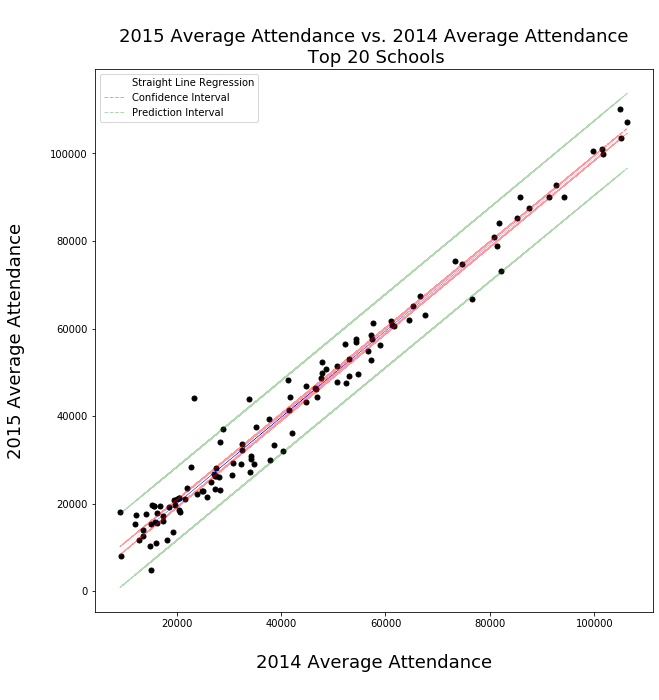

In [80]:
# plot the results
plt.figure(figsize = (10,10))
plt.scatter(football_stats['2014 Average Attendance'], football_stats['2015 Average Attendance'], s = 25, color = 'black')
plt.plot(football_stats['2014 Average Attendance'], modeling_data['y_hat'], color = 'blue', linewidth = 0.01, label = 'Straight Line Regression')

plt.plot(football_stats['2014 Average Attendance'], modeling_data['lower_ci'], color = 'red', linestyle = '--', linewidth = 1, alpha = 0.4, label = 'Confidence Interval')
plt.plot(football_stats['2014 Average Attendance'], modeling_data['upper_ci'], color = 'red', linestyle = '--', linewidth = 1, alpha = 0.4)

plt.plot(football_stats['2014 Average Attendance'], modeling_data['upper_pi'], color = 'green', linestyle = '--', linewidth = 1, alpha = 0.3, label = 'Prediction Interval')
plt.plot(football_stats['2014 Average Attendance'], modeling_data['lower_pi'], color = 'green', linestyle = '--', linewidth = 1, alpha = 0.3)
plt.xlabel('\n2014 Average Attendance\n', fontsize = 18)
plt.ylabel('2015 Average Attendance\n', fontsize = 18)
plt.title('\n2015 Average Attendance vs. 2014 Average Attendance\n Top 20 Schools', fontsize = 18)
plt.legend(loc = 2)
plt.show()

# Where do the values fall?

<p><b>Confidence Interval</b>
- Notice how the 95% confidence interval for E(Y) at each value of X covers very few of the observed data points.</p>
<p><b>Prediction Interval</b>
- Notice how the 95% prediction intervals for Y at each value of X cover most of the observed data points.</p>

# Why is there a difference?
A prediction interval is a range that likely contains the value of the dependent variable for a single new observation given specific values of the independent variables. With this type of interval, we’re predicting ranges for individual observations rather than the mean value. 

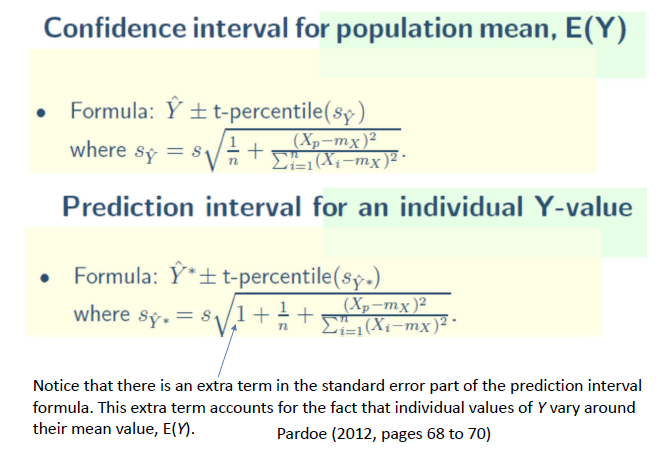

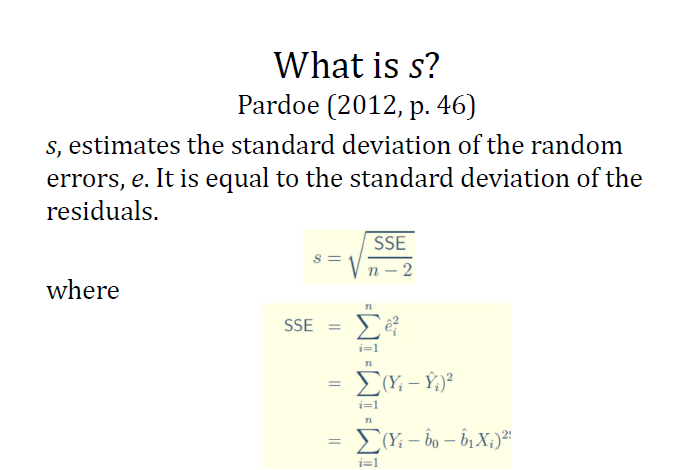

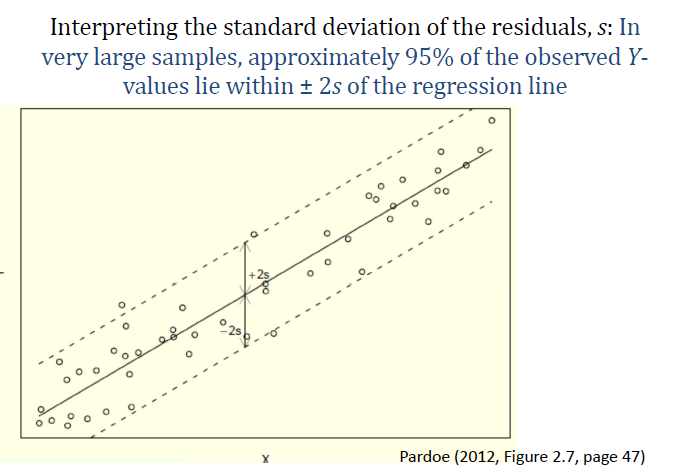

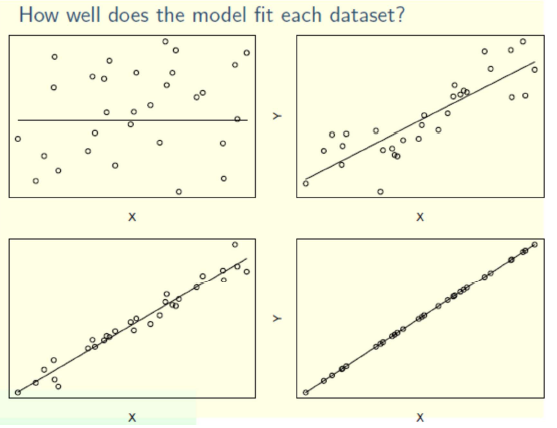

# Evaluateing Model Fit

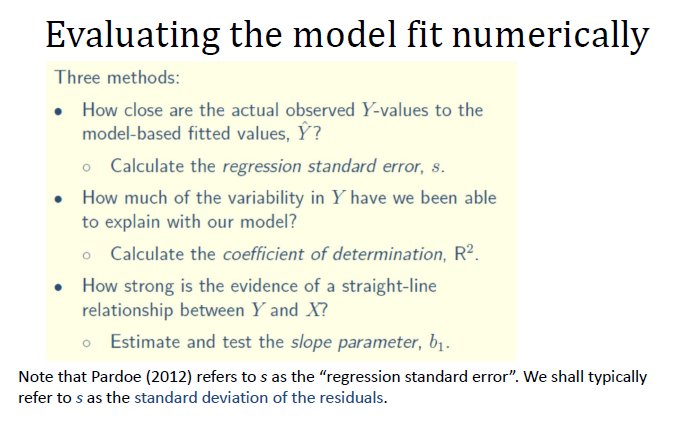

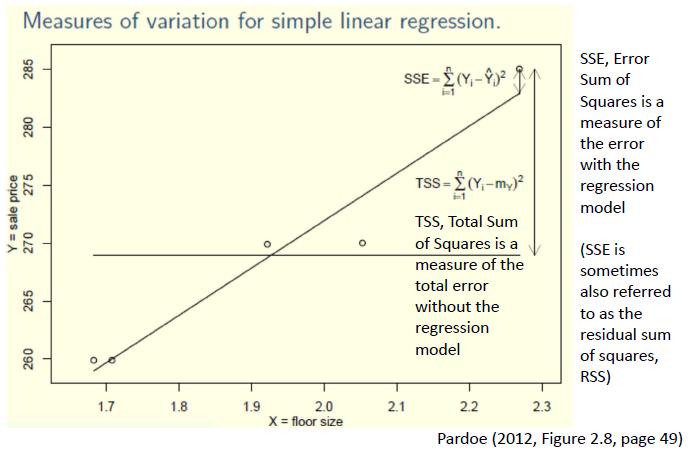

## R-Squared
R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model. 

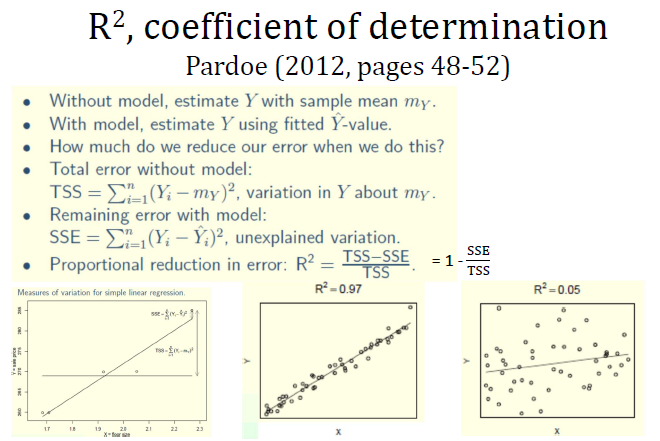

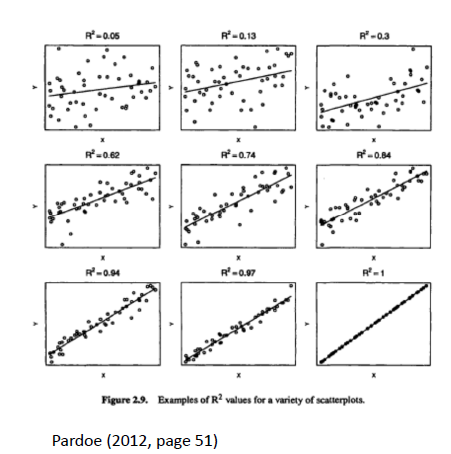

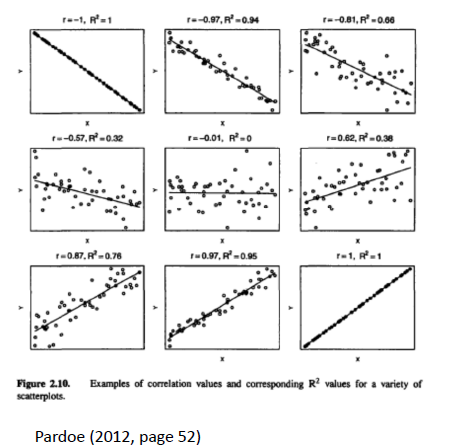

## How to use R-Squared to Interprate our Bivariate Model

In [39]:
# print the model summary
print_model = fitted.summary()
#print_model
print(print_model)

                               OLS Regression Results                              
Dep. Variable:     2015 Average Attendance   R-squared:                       0.974
Model:                                 OLS   Adj. R-squared:                  0.974
Method:                      Least Squares   F-statistic:                     4342.
Date:                     Tue, 01 Sep 2020   Prob (F-statistic):           9.16e-94
Time:                             10:26:11   Log-Likelihood:                -1150.7
No. Observations:                      118   AIC:                             2305.
Df Residuals:                          116   BIC:                             2311.
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

## Interpretation


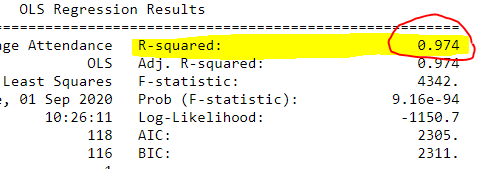

<p><b>R2 = 0.974, which looks at first sight to be very high.</b></p>
<p><b>Interpretation:</b> 97.4% of the variation in 2015 Average Attendance (about its mean) can be explained by a straight line regression model between 2015 Average Attendance and 2014 AverageAttendance.</p>

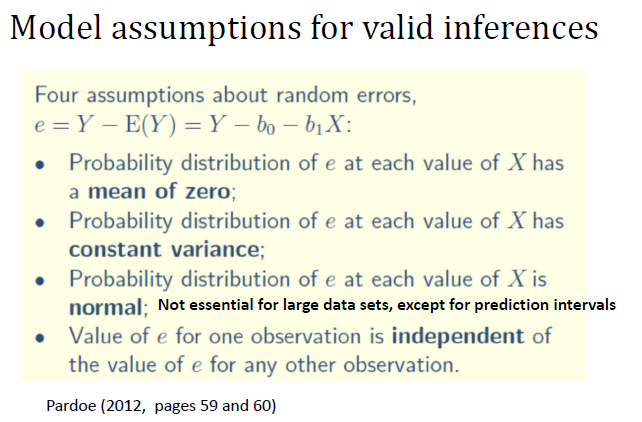

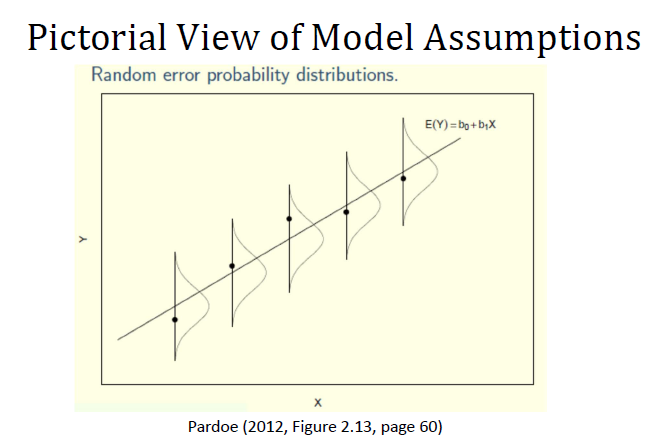

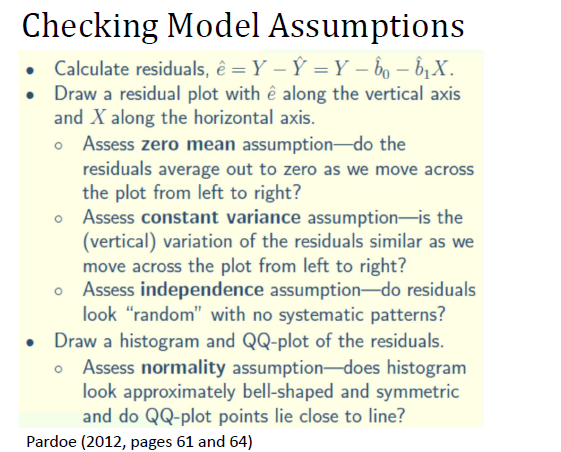

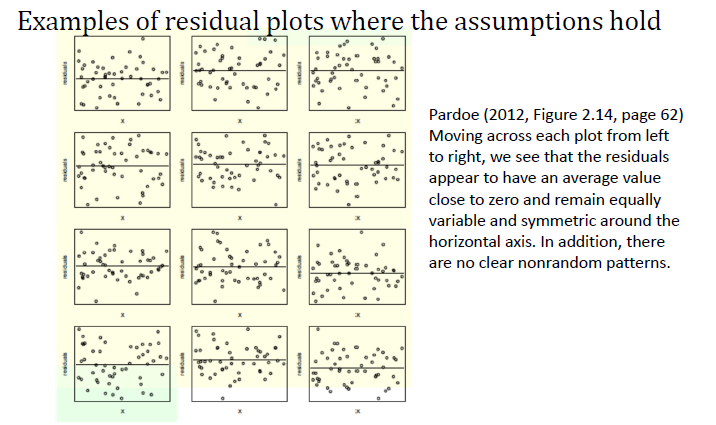

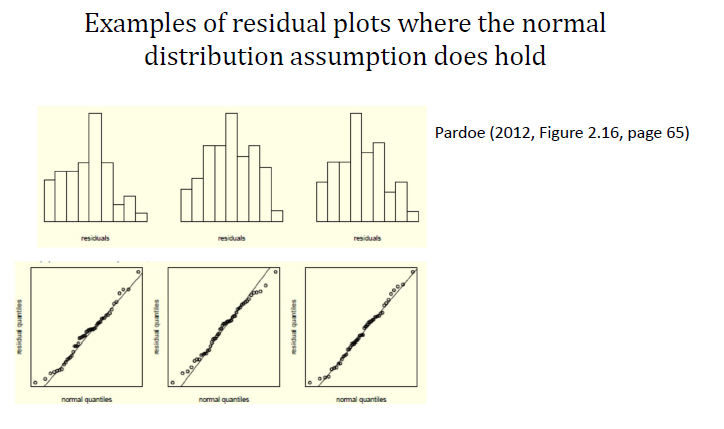

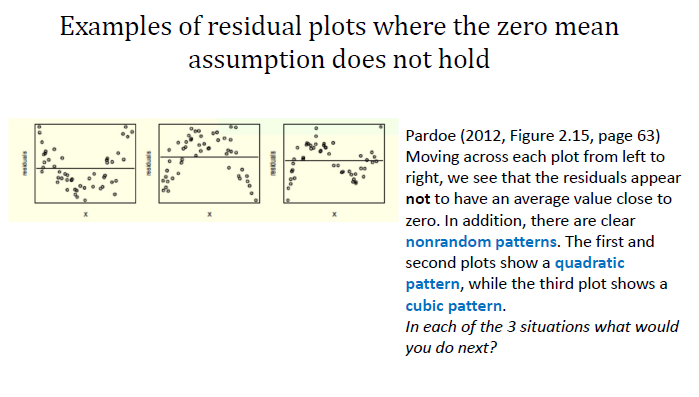

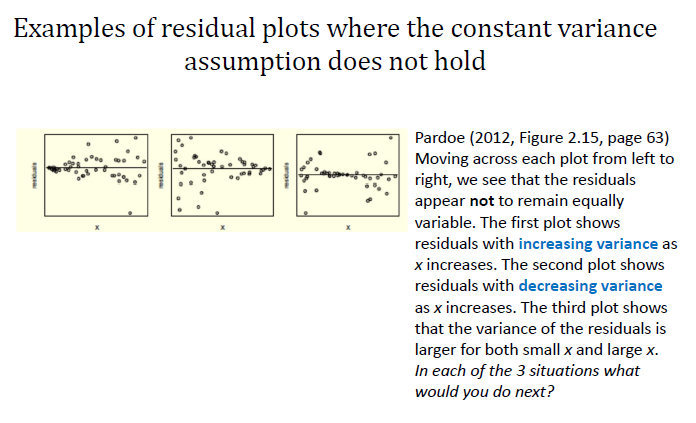

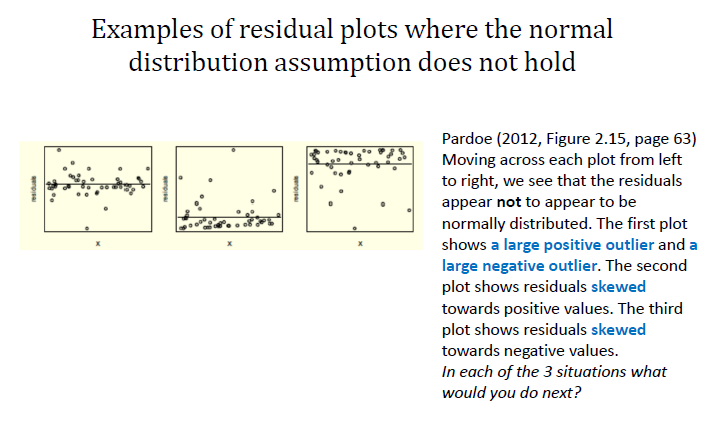

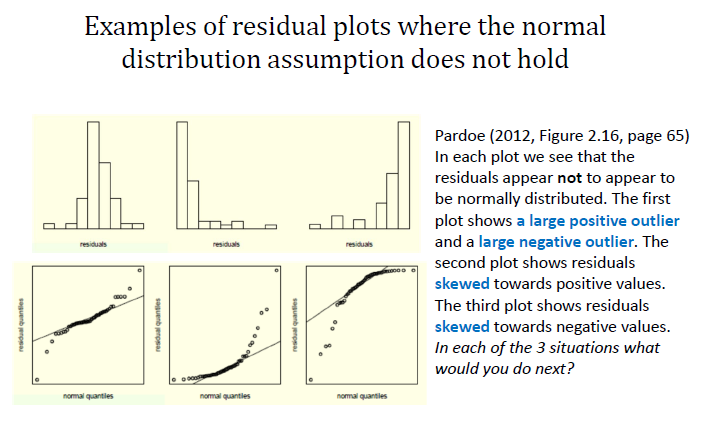

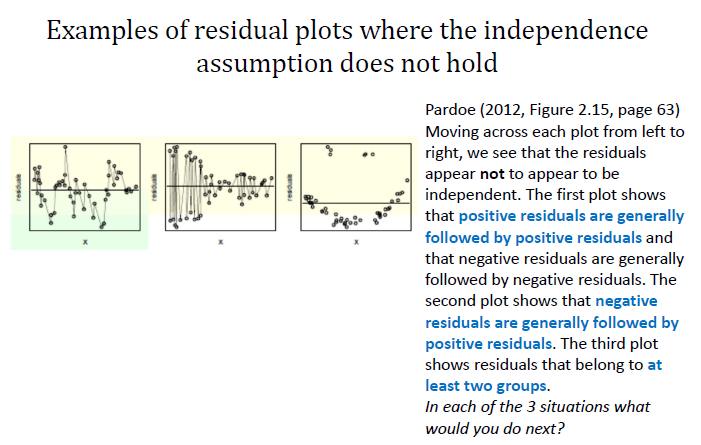

# How well does our model hold up to this type of scrutiny?

In [40]:
modeling_data

School  2014 Home Games  2014 Attendance  \
0         Air Force                6           168967   
1             Akron                6            55019   
2           Alabama                7           710736   
3           Arizona                7           354973   
4       Arizona St.                6           343073   
..              ...              ...              ...   
113      Washington                7           451555   
114  Washington St.                6           184762   
115   West Virginia                6           340117   
116     Western Ky.                6            97833   
117   Western Mich.                5            78124   

     2014 Average Attendance  2015 Home Games  2015 Attendance  \
0                      28161                6           156158   
1                       9170                6           108588   
2                     101534                7           707786   
3                      50710                6           308355   
4                      57179                7           368985   
..                       ...              ...              ...   
113                    64508                7           433432   
114                    30794                6           176444   
115                    56686                7           383779   
116                    16306                6           107759   
117                    15625                6           116646   

     2015 Average Attendance          y_hat        y_err  confidence  \
0                      26026   28014.920137 -1988.920137  811.207924   
1                      18098    9261.961884  8836.038116  926.615008   
2                     101112  100468.229908   643.770092  571.367588   
3                      51393   50281.280815  1111.719185  318.976677   
4                      52712   56669.195455 -3957.195455  654.509623   
..                       ...            ...          ...         ...   
113                    61919   63906.330468 -1987.330468  647.436505   
114                    29407   30614.916929 -1207.916929  799.334064   
115                    54826   56182.374939 -1356.374939  653.848753   
116                    17960   16308.516046  1651.483954  876.639581   
117                    19441   15636.052007  3804.947993  881.026748   

          upper_ci      lower_ci       upper_pi      lower_pi  
0     28826.128061  27203.712213   36365.780599  19664.059675  
1     10188.576892   8335.346877   17661.047162    862.876606  
2    101039.597496  99896.862321  108987.976551  91948.483266  
3     50600.257492  49962.304138   58624.117407  41938.444223  
4     57323.705078  56014.685833   65019.636149  48318.754762  
..             ...           ...            ...           ...  
113   64553.766974  63258.893963   72270.704718  55541.956219  
114   31414.250993  29815.582865   38962.074222  22267.759636  
115   56836.223693  55528.526186   64532.080956  47832.668923  
116   17185.155628  15431.876465   24685.065871   7931.966222  
117   16517.078755  14755.025259   24014.523952   7257.580062  

[118 rows x 14 columns]

### Residual by Predicted Plot

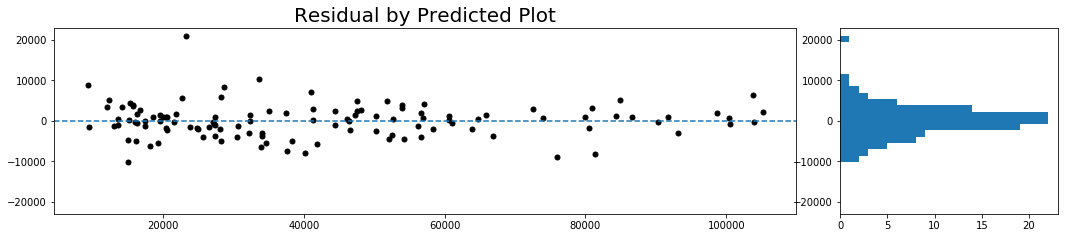

In [17]:
fig = plt.figure(figsize = (18,7))
ax1 = plt.subplot2grid((8, 4), (0, 0), rowspan=4, colspan=3)
ax2 = plt.subplot2grid((8, 4), (0, 3), rowspan=4, colspan=1)

ax1.scatter(modeling_data['y_hat'], modeling_data['y_err'], s = 25, color = 'black')
ax1.axhline(y=0, linestyle = '--')
ax1.set_ylim(bottom = -modeling_data['y_err'].max()*1.10,top = modeling_data['y_err'].max()*1.10)
ax1.set_title('Residual by Predicted Plot', fontsize = 20)
ax2.hist(modeling_data['y_err'], bins = 20, orientation='horizontal')
ax2.set_ylim(bottom = -modeling_data['y_err'].max()*1.10,top = modeling_data['y_err'].max()*1.10)
plt.show()

#### Possible Outlier Located
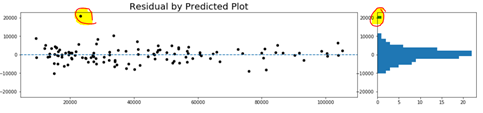

### Actual by Predicted Plot

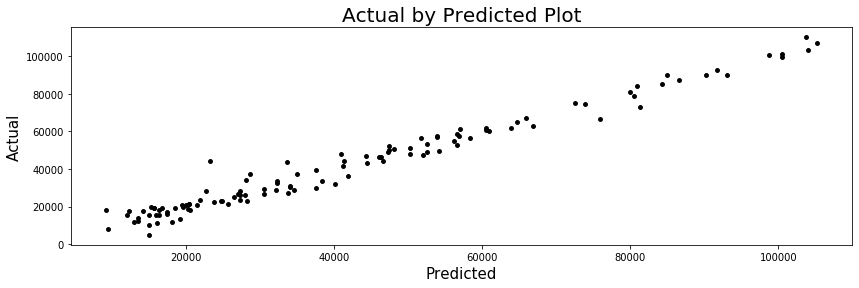

In [21]:
plt.figure(figsize = (14,4))
plt.scatter(modeling_data['y_hat'],modeling_data['2015 Average Attendance'], s = 15, color = 'black')
plt.ylabel('Actual', fontsize = 15)
plt.xlabel('Predicted', fontsize = 15)
plt.title('Actual by Predicted Plot', fontsize = 20)
plt.show()

### Residual by Row Plot

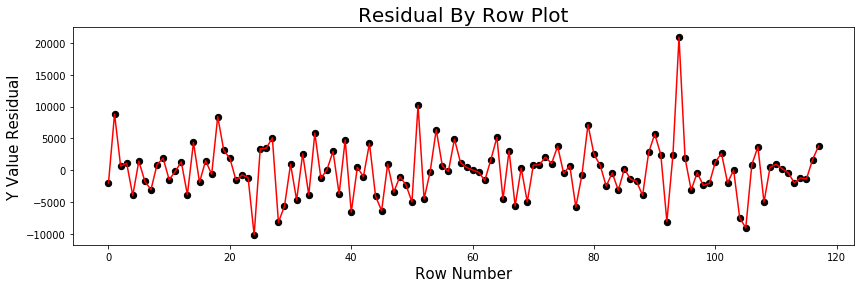

In [43]:
plt.figure(figsize = (14,4))
plt.scatter(modeling_data.index, modeling_data['y_err'], s = 40, color = 'black')
plt.plot(modeling_data.index, modeling_data['y_err'], color = 'r')
plt.ylabel('Y Value Residual', fontsize = 15)
plt.xlabel('Row Number', fontsize = 15)
plt.title('Residual By Row Plot', fontsize = 20)
plt.show()

#### Possible Outlier Detected

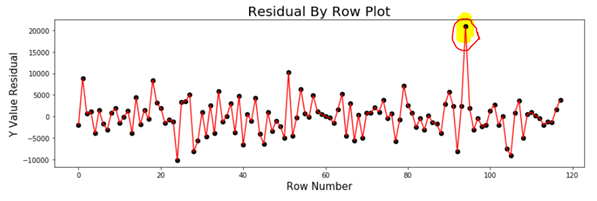

### Residual by X Plot

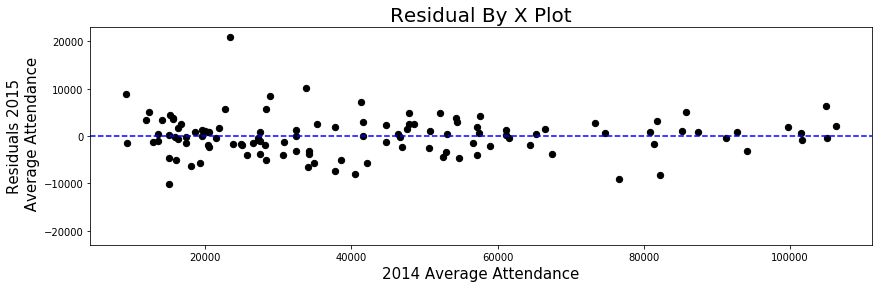

In [48]:
plt.figure(figsize = (14,4))
plt.scatter(modeling_data['2014 Average Attendance'], modeling_data['y_err'], s = 40, color = 'black')
#plt.plot(modeling_data.index, modeling_data['y_err'], color = 'r')
plt.axhline(y=0, color = 'blue', linestyle = '--')
plt.ylabel('Residuals 2015\n Average Attendance', fontsize = 15)
plt.xlabel('2014 Average Attendance', fontsize = 15)
plt.ylim(-modeling_data['y_err'].max()*1.10,modeling_data['y_err'].max()*1.10)
plt.title('Residual By X Plot', fontsize = 20)
plt.show()

### Three of the residual plot shows one potential outlier. Let's examine that data point. 


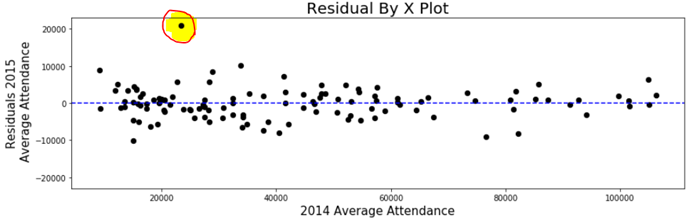

- <b><i>There is a school with 2015 residuals greater than 20,000.  Let's see which school it is!

In [50]:
modeling_data.loc[modeling_data['y_err'] >= 20000]

School  2014 Home Games  2014 Attendance  2014 Average Attendance  \
94  Temple                6           140217                    23370   

    2015 Home Games  2015 Attendance  2015 Average Attendance         y_hat  \
94                6           264951                    44159  23283.972689   

           y_err  confidence      upper_ci      lower_ci      upper_pi  \
94  20875.027311  835.274424  24119.247113  22448.698265  31643.441539   

        lower_pi  
94  14924.503839

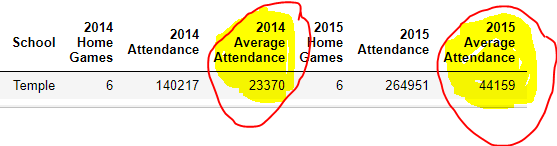

<p>Temple's attendance almost doubled from 2014 to 2015.</p>  <p><b>According to Wikipedia:</b>  <i>"The season was highlighted by the first win against Penn State since 1941, their first ever 7–0 start, and their first AP Poll and Coaches Poll ranking since 1979, and was considered a breakout season for the program."</i>
<p>
    <b>SOURCE:  </b>https://en.wikipedia.org/wiki/2015_Temple_Owls_football_team

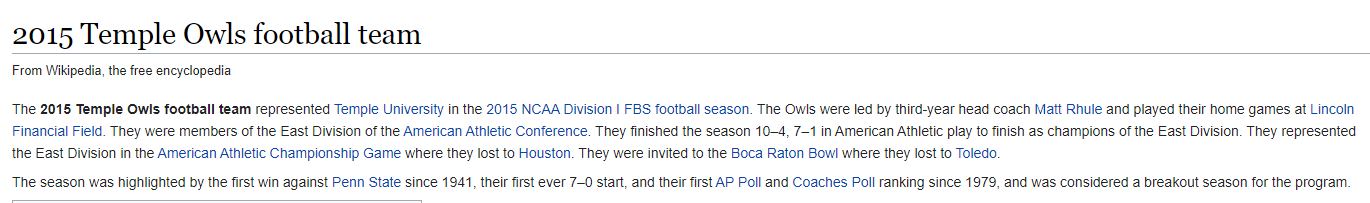

NBC SPORTS: https://www.nbcsports.com/philadelphia/ncaa/owls-1st-win-over-psu-1941-about-temple-not-penn-state

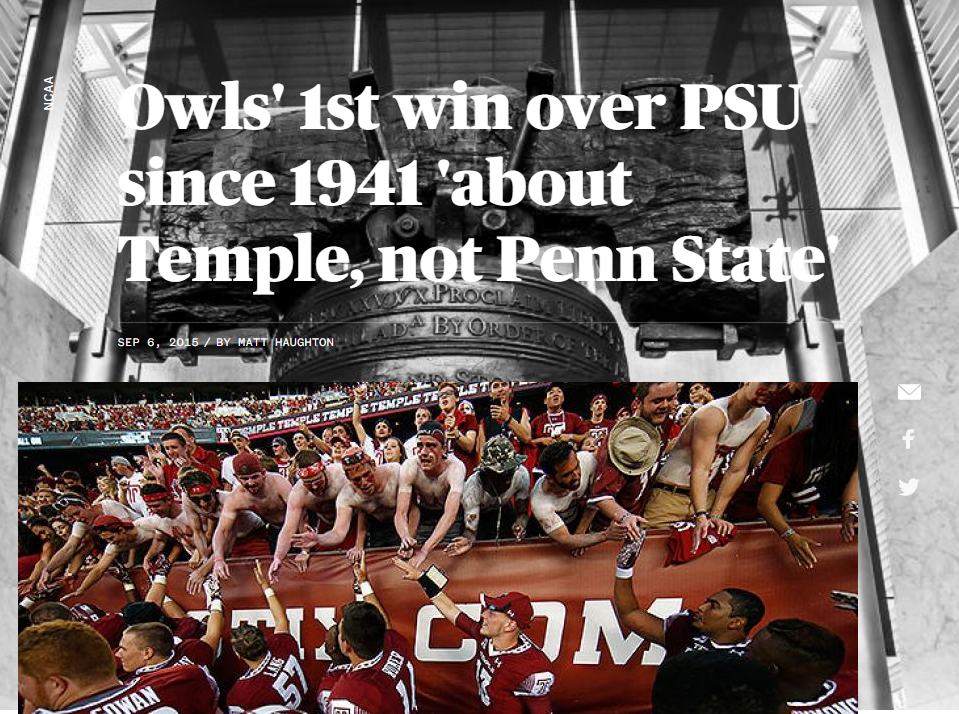

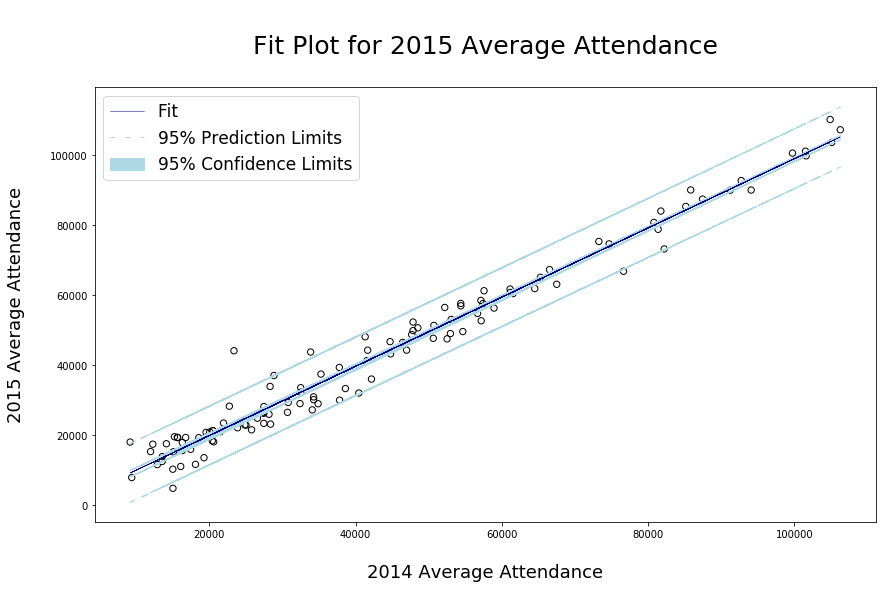

In [105]:
# plot the results
plt.figure(figsize = (14,8))
plt.scatter(football_stats['2014 Average Attendance'], football_stats['2015 Average Attendance'], s = 40, facecolors='none', edgecolors='black')
plt.plot(football_stats['2014 Average Attendance'], modeling_data['y_hat'], color = 'darkblue', label = 'Fit', linewidth = 0.5, alpha = 1)
plt.plot(football_stats['2014 Average Attendance'], modeling_data['lower_pi'], color = 'lightblue', linestyle = '--', dashes=(5, 10), linewidth = 1, alpha = 1, label = '95% Prediction Limits')
plt.plot(football_stats['2014 Average Attendance'], modeling_data['upper_pi'], color = 'lightblue', linestyle = '--', dashes=(5, 10), linewidth = 1, alpha = 1)
plt.fill_between(football_stats['2014 Average Attendance'], modeling_data['lower_ci'],modeling_data['upper_ci'], color = 'lightblue', alpha = 1, label = '95% Confidence Limits')
plt.xlabel('\n2014 Average Attendance\n', fontsize = 18)
plt.ylabel('2015 Average Attendance\n', fontsize = 18)
plt.title('\nFit Plot for 2015 Average Attendance\n', fontsize = 25)
plt.legend(loc = 2, fontsize = 17)
plt.show()

# QUESTIONS

## QUESTION 1:  Which schools are outside the Prediction Limits?

In [107]:
modeling_data['School'].loc[(modeling_data['2015 Average Attendance']<modeling_data['lower_pi'])|(modeling_data['2015 Average Attendance']>modeling_data['upper_pi']) ]


10    Florida St.
15           UCLA
Name: School, dtype: object

## QUESTION 2: Which schools are outside the Confidence Limits?

In [108]:
modeling_data['School'].loc[(modeling_data['2015 Average Attendance']<modeling_data['lower_ci'])|(modeling_data['2015 Average Attendance']>modeling_data['upper_ci']) ]


1                Michigan
4                   Texas
8                 Florida
10            Florida St.
11                Clemson
12         South Carolina
15                   UCLA
17    Southern California
18                   Iowa
19               Arkansas
21             Washington
24        Mississippi St.
25               Kentucky
Name: School, dtype: object